In [29]:
import pandas as pd

ATATÜRK_files = ["ATATÜRK HES Gercek_Zamanli_Uretim-01012024-31032024.csv", "ATATÜRK HES Gercek_Zamanli_Uretim-01042024-30062024.csv", "ATATÜRK HES Gercek_Zamanli_Uretim-01072024-30092024.csv"]
dfs = [pd.read_csv(file, sep = ";", parse_dates=["Tarih"]) for file in ATATÜRK_files]
ATATÜRK = pd.concat(dfs, ignore_index=True)
ATATÜRK["Datetime"] = pd.to_datetime(ATATÜRK["Tarih"] + " " + ATATÜRK["Saat"], dayfirst = True)
ATATÜRK = ATATÜRK.set_index("Datetime")
ATATÜRK['Barajlı'] = pd.to_numeric(ATATÜRK['Barajlı'].str.replace(',', '.'), errors='coerce')
ATATÜRK = ATATÜRK[["Barajlı"]]

ILISU_files = ["ILISU HES Gercek_Zamanli_Uretim-01012024-31032024.csv", "ILISU HES Gercek_Zamanli_Uretim-01042024-30062024.csv", "ILISU HES Gercek_Zamanli_Uretim-01072024-30092024.csv"]
dfs = [pd.read_csv(file, sep=";", parse_dates=["Tarih"]) for file in ILISU_files]
ILISU = pd.concat(dfs, ignore_index=True)
ILISU["Datetime"] = pd.to_datetime(ILISU["Tarih"] + " " + ILISU["Saat"], dayfirst=True)
ILISU = ILISU.set_index("Datetime")
ILISU['Barajlı'] = pd.to_numeric(ILISU['Barajlı'].str.replace(',', '.'), errors='coerce')
ILISU = ILISU[["Barajlı"]]

KARAKAYA_files = ["KARAKAYA HES Gercek_Zamanli_Uretim-01012024-31032024.csv", "KARAKAYA HES Gercek_Zamanli_Uretim-01042024-30062024.csv", "KARAKAYA HES Gercek_Zamanli_Uretim-01072024-30092024.csv"]
dfs = [pd.read_csv(file, sep=";", parse_dates=["Tarih"]) for file in KARAKAYA_files]
KARAKAYA = pd.concat(dfs, ignore_index=True)
KARAKAYA["Datetime"] = pd.to_datetime(KARAKAYA["Tarih"] + " " + KARAKAYA["Saat"], dayfirst=True)
KARAKAYA = KARAKAYA.set_index("Datetime")
KARAKAYA['Barajlı'] = pd.to_numeric(KARAKAYA['Barajlı'].str.replace(',', '.'), errors='coerce')
KARAKAYA = KARAKAYA[["Barajlı"]]

KEBAN_files = ["KEBAN HES Gercek_Zamanli_Uretim-01012024-31032024.csv", "KEBAN HES Gercek_Zamanli_Uretim-01042024-30062024.csv", "KEBAN HES Gercek_Zamanli_Uretim-01072024-30092024.csv"]
dfs = [pd.read_csv(file, sep=";", parse_dates=["Tarih"]) for file in KEBAN_files]
KEBAN = pd.concat(dfs, ignore_index=True)
KEBAN["Datetime"] = pd.to_datetime(KEBAN["Tarih"] + " " + KEBAN["Saat"], dayfirst=True)
KEBAN = KEBAN.set_index("Datetime")
KEBAN['Barajlı'] = pd.to_numeric(KEBAN['Barajlı'].str.replace(',', '.'), errors='coerce')
KEBAN = KEBAN[["Barajlı"]]

In [30]:
df = pd.DataFrame({
    'ATATÜRK': ATATÜRK['Barajlı'],
    'ILISU': ILISU['Barajlı'],
    'KEBAN': KEBAN['Barajlı'],
    'KARAKAYA': KARAKAYA['Barajlı']
})

df.head(20)

,ATATÜRK,ILISU,KEBAN,KARAKAYA
Datetime,,,,
2024-01-01 00:00:00,1196.15,774.68,618.10,844.10
2024-01-01 01:00:00,1141.79,635.34,618.08,683.80
2024-01-01 02:00:00,808.23,322.92,617.84,467.47
2024-01-01 03:00:00,543.46,155.04,605.24,281.38
2024-01-01 04:00:00,540.90,155.02,463.97,236.56
2024-01-01 05:00:00,541.31,155.02,463.90,0.00
2024-01-01 06:00:00,461.20,155.03,463.94,0.00
2024-01-01 07:00:00,541.06,155.05,462.30,0.00
2024-01-01 08:00:00,742.80,155.05,221.73,2.22


In [33]:
(df < 5).sum()

ATATÜRK     1258
ILISU         76
KEBAN         36
KARAKAYA     520
dtype: int64

In [32]:
df_daily = df.resample('D').mean()
df_daily

,ATATÜRK,ILISU,KEBAN,KARAKAYA
Datetime,,,,
2024-01-01,1006.780417,441.555417,612.184167,531.930833
2024-01-02,1077.928750,518.543750,778.173750,843.403750
2024-01-03,1109.007500,511.299583,799.221667,871.102917
2024-01-04,1118.069167,515.430417,851.338750,941.370417
2024-01-05,1023.236250,541.181667,831.440833,956.631667
...,...,...,...,...
2024-09-26,505.474583,430.142917,679.751667,732.725833
2024-09-27,637.611667,417.729583,666.737917,833.072917
2024-09-28,690.095417,445.100833,622.898750,736.405000


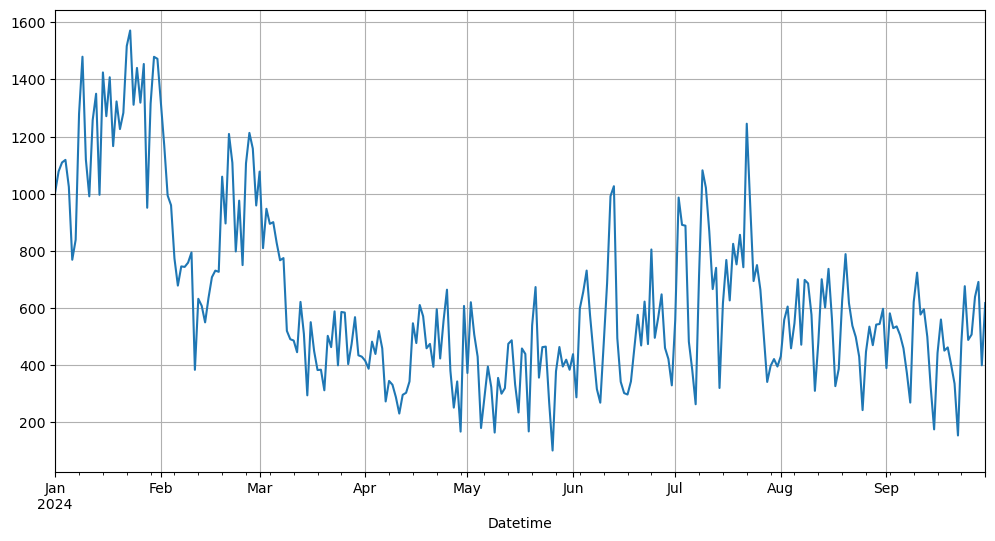

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_daily["ATATÜRK"].plot.line()


plt.grid(True)
plt.show()


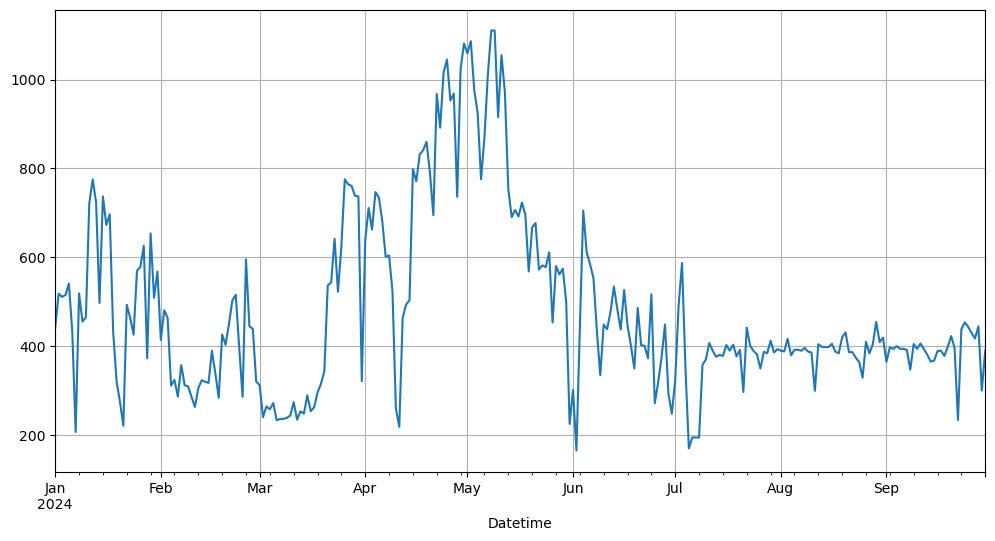

In [37]:
plt.figure(figsize=(12, 6))
df_daily["ILISU"].plot.line()
plt.grid(True)
plt.show()

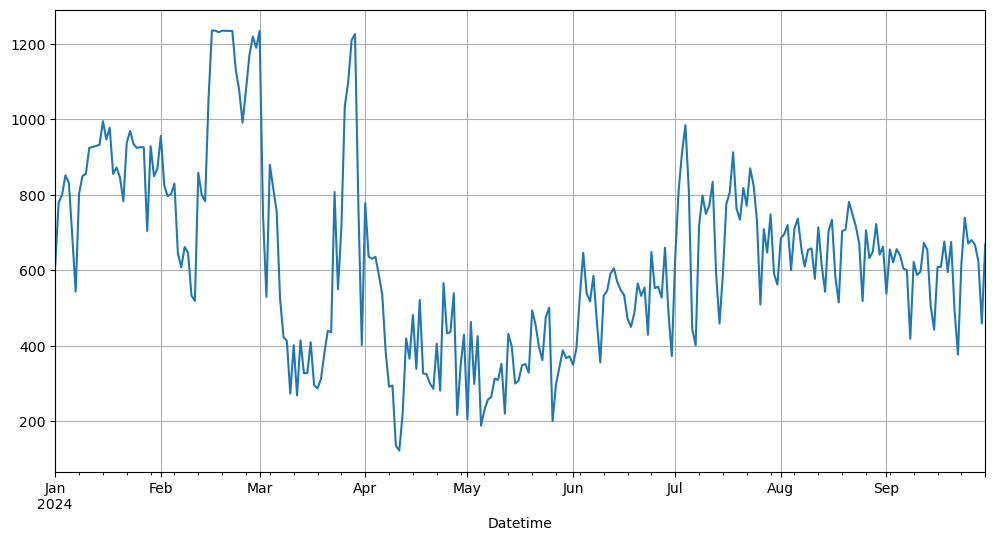

In [38]:
plt.figure(figsize=(12, 6))
df_daily["KEBAN"].plot.line()
plt.grid(True)
plt.show()

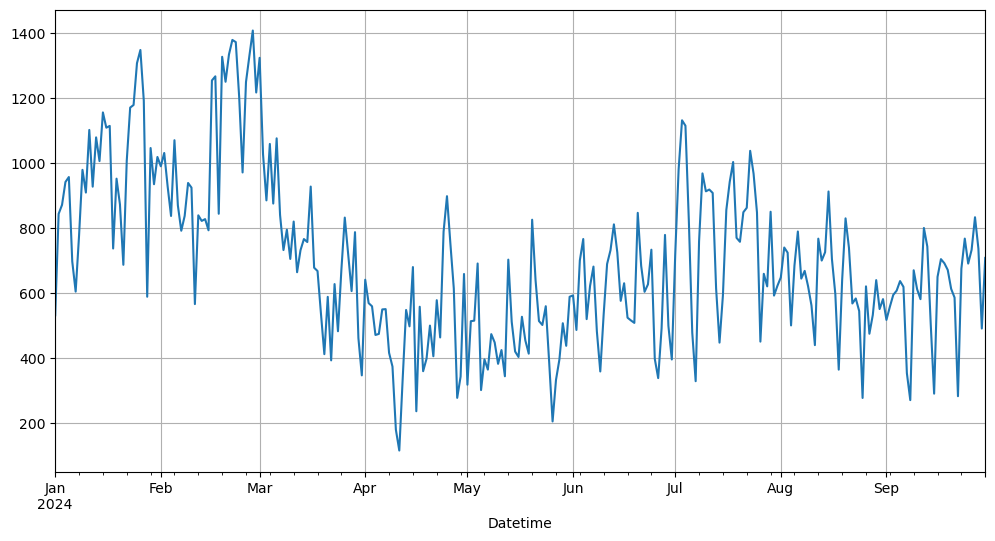

In [39]:
plt.figure(figsize=(12, 6))
df_daily["KARAKAYA"].plot.line()
plt.grid(True)
plt.show()